In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import itertools
import datetime
import matplotlib.dates as mdates
import numpy as np

In [189]:
randomise_and_hide_data = True

In [190]:
#Read in the data 
# df = pd.read_csv('Data_for_graph.csv’)
# filename = 'Monthly Standard Report 8.xlsx'
filename = 'Monthly Standard Report 8.xlsx'
tab_name = 'Raw QC Data'
directory = './data/'

min_date = datetime.date(2020, 2,22)
max_date = datetime.date(2020, 2,24)

In [191]:
df = pd.read_excel(directory+filename,sheet_name=tab_name,header=6)
if not randomise_and_hide_data:
    df

In [192]:
qc_ids = df[' QC ID'].unique()
if not randomise_and_hide_data:
    print(qc_ids)

analyzers = df[' Analyzer'].unique()
if not randomise_and_hide_data:
    print(analyzers)

In [193]:
if not randomise_and_hide_data:
    list(df)

In [194]:
#Convert the date column to a recognised format called ‘datetime'
df['Date of Result'] = pd.to_datetime(df['Date of Result'], infer_datetime_format=True)

In [195]:
if not randomise_and_hide_data:
    df['Date of Result']

In [196]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

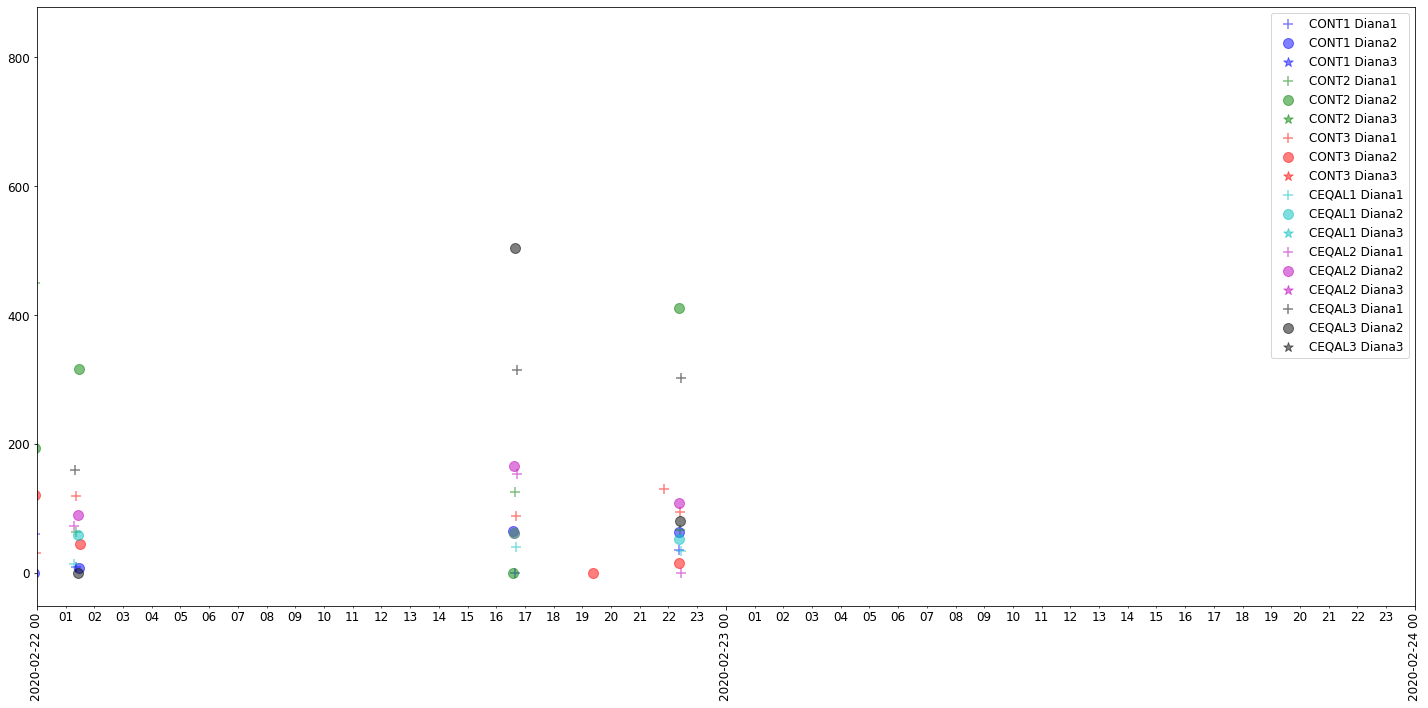

In [197]:





markers = itertools.cycle(('+', 'o', '*')) 
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 

#plot the data
# plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
for qc_id in qc_ids:
    df_tempory = df[df[' QC ID'] == qc_id]
    colour = next(colours)
    for analyzer in analyzers:
        df_tempory2 = df_tempory[df_tempory[' Analyzer'] == analyzer]
        randomising_numbers = np.random.randint(10, size=len(df_tempory2[' Result Value'].values))/10.0
        if not randomise_and_hide_data:
            randomising_numbers[:] = 1.0
        plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values * randomising_numbers,s=100,c=colour,marker = next(markers),alpha=0.5,label = qc_id+' '+analyzer)
#         plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values,s=100,c=colour,marker = next(markers),alpha=0.5,label = qc_id+' '+analyzer)


        
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator()  # every week
days = mdates.DayLocator()  # every day
hours = mdates.HourLocator()  # every hour


if (max_date-min_date).days > 10:
    ax.xaxis.set_major_locator(weeks) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(days) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=45)
if (max_date-min_date).days <= 10:
    ax.xaxis.set_major_locator(days) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(hours) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=90)


plt.legend(bbox_to_anchor=(1.0, 1.00))

ax.set_xlim([min_date,max_date])

plt.tight_layout()
plt.savefig('./plots/all_analysers_and_controls.png',dpi=300)
plt.show()

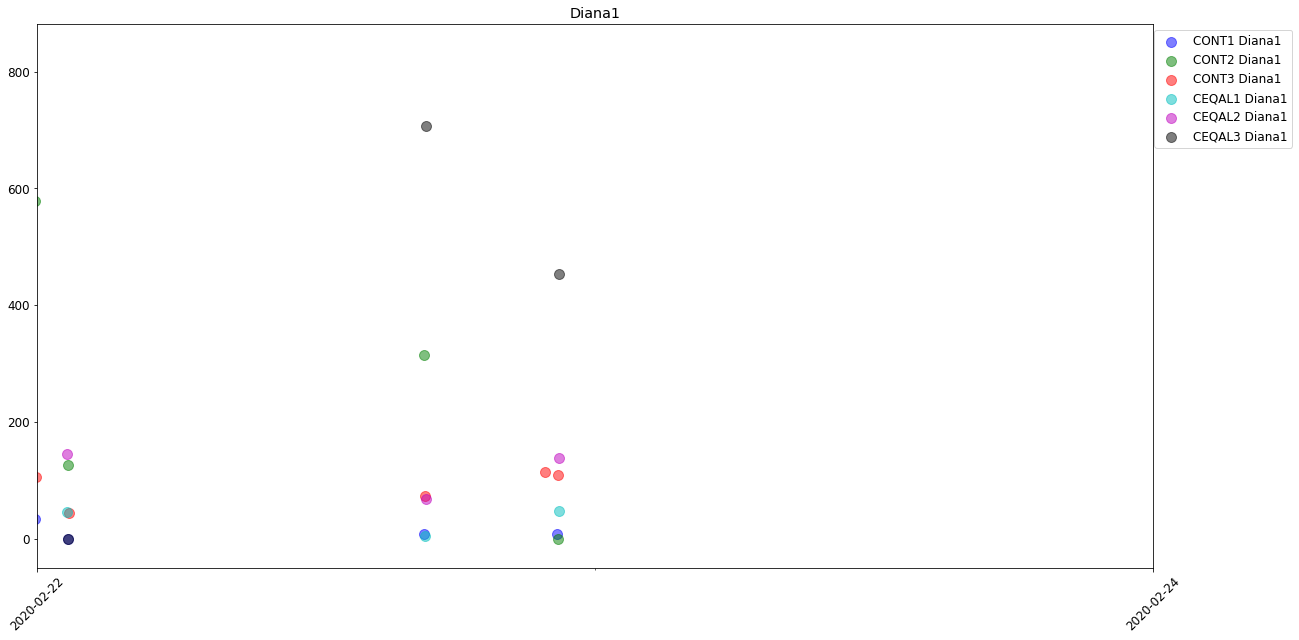

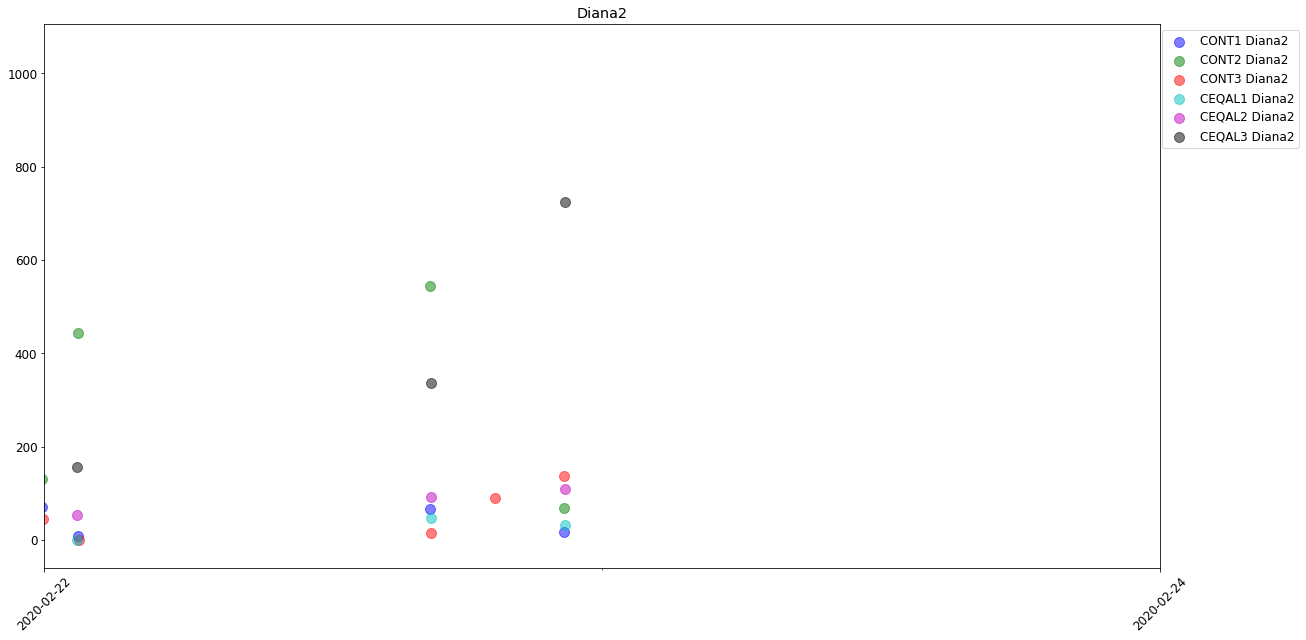

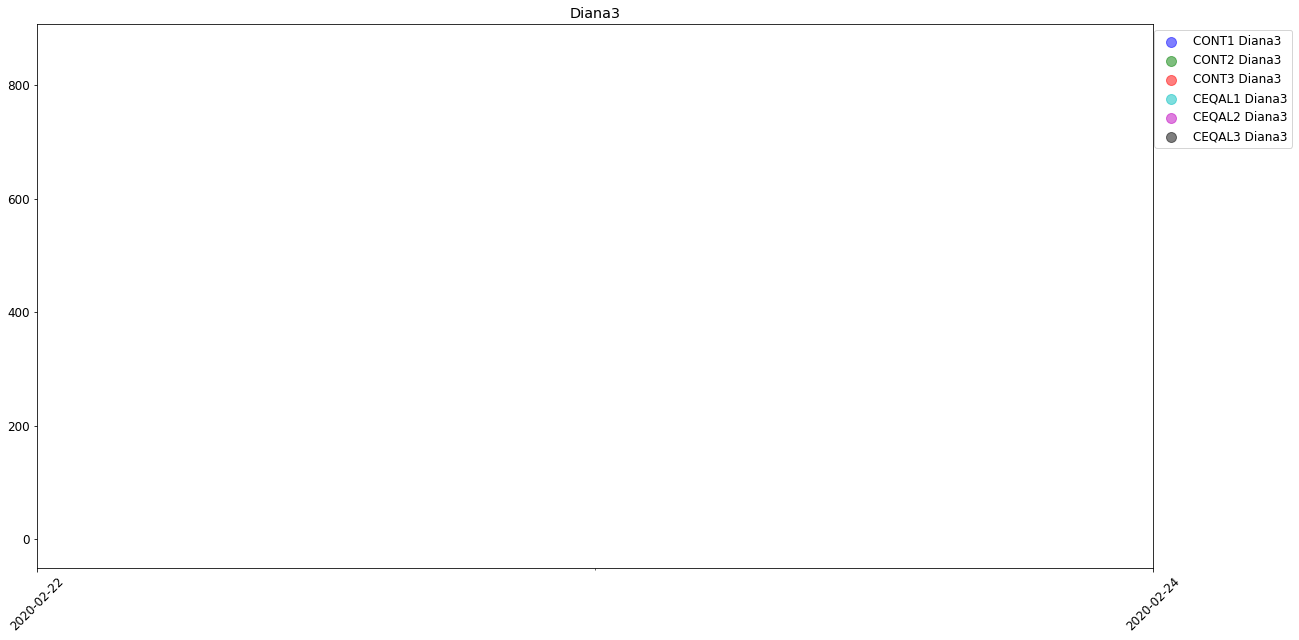

In [198]:


markers = itertools.cycle(('+', 'o', '*')) 
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 

for analyzer in analyzers:
    #plot the data
    # plt.figure()
    f, ax = plt.subplots(figsize=(20,10))
    for qc_id in qc_ids:
        df_tempory = df[df[' QC ID'] == qc_id]
        colour = next(colours)
    #     for analyzer in analyzers:
        df_tempory2 = df_tempory[df_tempory[' Analyzer'] == analyzer]
        randomising_numbers = np.random.randint(10, size=len(df_tempory2[' Result Value'].values))/10.0
        if not randomise_and_hide_data:
            randomising_numbers[:] = 1.0
        plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values * randomising_numbers,s=100,c=colour,alpha=0.5,label = qc_id+' '+analyzer)

    
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    days = mdates.DayLocator()  # every day
    weeks = mdates.WeekdayLocator()  # every week

    ax.xaxis.set_major_locator(weeks) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(days) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=45)

    plt.legend(bbox_to_anchor=(1.13, 1.00))
#     ax.xaxis.set_major_locator(plt.MaxNLocator(70))
    ax.set_xlim([min_date,max_date])
    plt.title(analyzer)
    plt.savefig('./plots/'+analyzer+'_all_controls.png',dpi=300)
    plt.show()

In [199]:
#save the data with the improved date column to files
df.to_csv('./cco_qc_analysis_for_excel.csv')